* Your Name:  Gregory Roberts
* Deadline: 11am, March 26, Saturday
* This exam is open-book and open-note. However, you must complete it independently and no collaboration is allowed.
* Submission Instruction: Shared it with Yifeng.Zhu@maine.edu

# Question 1 (10 points): AFR of hard drives

You are to find the [Annualized Failure Rate](https://en.wikipedia.org/wiki/Annualized_failure_rate) of disks based on this [harddrive dataset](https://www.kaggle.com/datasets/backblaze/hard-drive-test-data).  

This dataset consists of 3,179,295 records for a total of 65,993 hard drives. The records are collected during the period of 120 days, from 2016-01-01 to 2016-04-29. Note that each disk serial number can uniquely identify a disk globally.

You need to find the up time for each disk during this 120-day period, and calculate the [Mean time between failures (MTBF)](https://en.wikipedia.org/wiki/Mean_time_between_failures):

\begin{equation}
\text{MTBF} = \frac{\sum_{i}{(\text{start time of disk i} - \text{end time of disk i})}}{\text{total number of disk failures}}
\end{equation}

Annualized failure rate (AFR) can be caculated using the following equation:

\begin{equation}
AFR = 1-e^{\frac{-8766}{MTBF}}
\end{equation}

where Mean Time Between Failure (MTBF) are in hours, and there are 8766 hours in a year.


In [ ]:
# Download the dataset
!wget https://web.eece.maine.edu/~zhu/DL/archive.zip
# -o  overwrite files WITHOUT prompting
!unzip -o archive.zip
!ls

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# Read the hard drive dataset
df = pd.read_csv('./harddrive.csv')
print(df.shape)

In [ ]:
# Extract relevant columns and ignore the other columns
hdd_df = df[['date', 'serial_number', 'failure']]
# sorting by serial number and then by date, to get the failure as last value (end of cycle)
hdd_df = hdd_df.sort_values(['serial_number', 'date'])
hdd_df.reset_index(inplace=True, drop=True)
hdd_df['date'] = pd.to_datetime(hdd_df['date'])
hdd_df.shape

In [ ]:
hdd_df.head()


In [ ]:
# number of hdd
print("number of hdd:", hdd_df['serial_number'].value_counts().shape) 

## Write code below to calculate the average MTBF of all drive

In [ ]:
# count the number of failures in data frame
totalFailures = hdd_df['failure'].sum()
print ('Total Failures       : %1d' % totalFailures)

# number of hours in 120 days
periodHours = 120 * 24
print('Hours in 120 days    : %1d' % periodHours)

# number of drives times the number of hours in 120 days
hours = 65993 * periodHours
print('Hours for all drives : %1d' % hours)

# the hours in the period divided by the number of failures
mtbf = hours/totalFailures
print('MTBF (hours)         : %1.2f' % mtbf)

# Write code below to calculate the anualized failure rate based on the average MTBF calculated above 

In [ ]:
# Put your code here
afr = 8766/mtbf
print('AFR                  : %2.2f%%' % afr)

# Question 2 (10 points): Performance Evaluation

## Analysis of Strong Scaling via Amdahl's Law
We have introduced [Amdahl's Law](https://en.wikipedia.org/wiki/Amdahl%27s_law) in the class. Suppose the workload $W$ is fixed but the number of processors that can work on $W$ can be increased. The speedup of $N$ processor systems is defined as 
\begin{equation} 
Speedup = \frac{\text{Time on 1 processor of solving W}}{\text{Time on N processors of solving W}} = \frac{T_s}{T_p} = \frac{1}{(1-p) + \frac{p}{N}}
\end{equation}
where $T_s$ is the sequentail time running on a processor, $T_p$ is the parallel time running on N processors, and  $p$ is the time portion of the algorithm that can be parallelized.  

Amdahl’s law states that, for a fixed problem, the upper limit of speedup is determined by the serial fraction of the code:
\begin{equation}
Speedup < \lim_{N \to \infty} \frac{1}{(1-p) + \frac{p}{N}} = \frac{1}{1-p}
\end{equation}
Amdal's law describes **strong scaling**, where the workload size is kept fixed.

## Analysis of Weak Scaling via Gustafson's Law
The [Gustafson's Law](https://en.wikipedia.org/wiki/Gustafson%27s_law) uses a different assumption. While the Amdahl's law assumes that the workload size is fixed,  the Gustafson's law assumes that the parallel part increases as the system scales up but the serial part remains fixed.

\begin{eqnarray}
T_p & = & a + b \\
T_s & = & a + N \times b \\
\end{eqnarray}

where $a$ and $b$ is time spent executing the serial parts and the parallel parts on the parallel systems, respectively.

Therefore, the speedup (often called ***scaled speedup***) is

\begin{eqnarray}
Speedup & = & \frac{T_s}{T_p} \\
  & = &  \frac{a + N \times b}{a + b} \\
  & = &  s + (1-s) \times N \\
\end{eqnarray}


where $s$ is the fractions of time spent executing the serial parts, and $s = \frac{a}{a+b}$. 

Alternatively, the speedup can be expressed using $p$, which is the fraction of time spent executing the parallel parts on the parallel systems, and $s + p = 1$
\begin{equation}
Speedup = (1-p) + p \times N = 1 + p \times (N -1)
\end{equation}

Gustafson's law describes **weak scaling**, where the scaled speedup is calculated based on the amount of work done for a scaled problem size (in contrast to Amdahl’s law which focuses on fixed problem size). 

KeyboardInterrupt: ignored

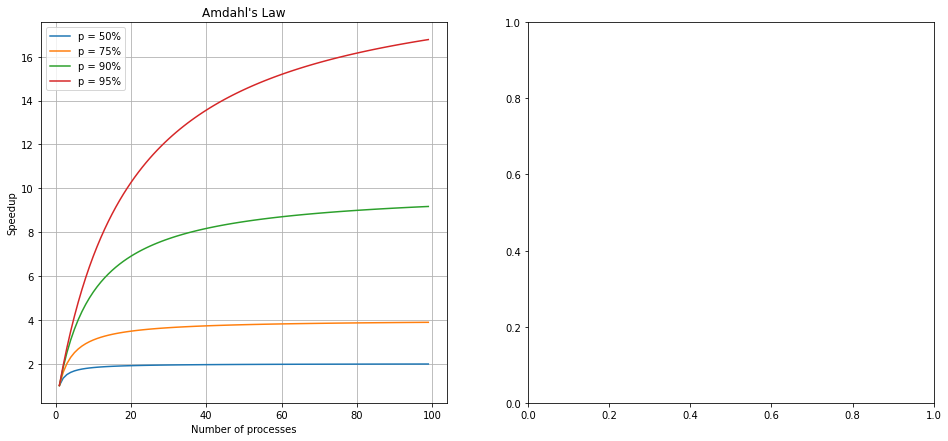

In [ ]:
#@title
import numpy as np
import matplotlib.pyplot as plt

def amdahls_law(p, N):
    return ((1-p) + p/N)**-1

def gustafson_law(p, N):
    return (1-p) + p*N

N = np.arange(1, 100)

plt.subplots(nrows=1, ncols=2, figsize=(16, 7))

plt.subplot(1, 2, 1)
plt.title("Amdahl's Law")
plt.plot(N, [amdahls_law(0.5, n) for n in N], label="p = 50%")
plt.plot(N, [amdahls_law(0.75, n) for n in N], label="p = 75%")
plt.plot(N, [amdahls_law(0.90, n) for n in N], label="p = 90%")
plt.plot(N, [amdahls_law(0.95, n) for n in N], label="p = 95%")

plt.legend()
plt.xlabel("Number of processes")
plt.ylabel("Speedup")
plt.grid()

plt.subplot(1, 2, 2)
plt.title("Gustafson's Law")
plt.plot(N, [gustafson_law(0.5, n) for n in N], label="p = 50%")
plt.plot(N, [gustafson_law(0.75, n) for n in N], label="p = 75%")
plt.plot(N, [gustafson_law(0.90, n) for n in N], label="p = 90%")
plt.plot(N, [gustafson_law(0.95, n) for n in N], label="p = 95%")
plt.legend()
plt.xlabel("Number of processes")
plt.ylabel("Speedup")
plt.grid()

plt.tight_layout()
plt.show()

## Question: 

Supposed you are to investigate the scalability of parallel software programs in which the serial portion would not grow as the program size increase. For example, a program must read file data serailly, but the time to read these data is indepdendent of the problem size. Should strong scaling anlysis or weak scaling analysis be prefered? Why?

**Answer :** Weak scaling analysis via Gustafson's Law would be prefered. As the serial portion does not increase and is independent of the parallel portion that is working on the data ingested. From the above information "the Gustafson's law assumes that the parallel part increases as the system scales up but the serial part remains fixed.".













# Question 3 (10 points): Comparing Systems

We are comparing two data compression algorithms: *bzip* and *gzip*. The following data consists of three columns: 
1.   orginal file size
2.   file size after compression by bzip
3.   file size after compression by gzip

At the 90% confidence level, can we say bzip compresses better than gzip?

In [ ]:
!wget https://web.eece.maine.edu/~zhu/DL/compress.csv

In [ ]:
import numpy as np
import pandas as pd
import math
import scipy.stats as stats
import matplotlib.pyplot as plt
import statistics

In [ ]:
df = pd.read_csv('./compress.csv')
df.shape

In [ ]:
df.head()

In [ ]:
bzip = df[['bzip']].to_numpy()
gzip = df[['gzip']].to_numpy()

F, p = stats.f_oneway(bzip, gzip)

print('statistics = %1f , p-value = %e\n' % (F, p))
print('The p-value is significantly less than 0.1%. Therefore, we can reject the null hypothesis.')
print('And we can conclude that bzip does not compresses better than gzip.')

# Question 4 (10 points): Parallel Computing

The following code calculates the sum of array using **Send()** and **Recv()**. Rewrite the code using **Scatter()** and **Reduce()** to improve the efficiency of the code. You might find these two demos are helpful [MPI demo 1](https://colab.research.google.com/drive/18VG_B11qoDMm2wzfNXl8MayxyHy6x6om?usp=sharing), and [MPI demo 2](https://colab.research.google.com/drive/1b21L9_yZG7sbCN66B-6k5ZV0EkyH4pB2?usp=sharing).

In [ ]:
!pip install mpi4py

In [ ]:
%%file sum.py
from mpi4py import MPI
import numpy as np

comm = MPI.COMM_WORLD
rank = comm.Get_rank()
size = comm.Get_size()
N = 10

if(rank == 0):
    data = np.arange(N*size, dtype='i')
    for i in range(1, size):
        SLICE = data[i*N:(i+1)*N]
        comm.Send([SLICE, MPI.INT], dest=i)
    myData = data[0:N]
else:
    myData = np.empty(N, dtype='i')
    comm.Recv([myData, MPI.INT], source=0)

S = sum(myData)
print(rank, 'has data', myData, 'sum =', S)

sums = np.zeros(size, dtype='i')
if(rank > 0):
    comm.send(S, dest=0)
else:
    sums[0] = S
    for i in range(1, size):
        sums[i] = comm.recv(source=i)
    print('total sum =', sum(sums))

In [ ]:
!mpirun --allow-run-as-root -n 4 python sum.py

Rewrite the above MPI program using `Scatter()` (or scatter()) and `Reduce()` (or reduce()), instead of `Send()`/`send()` and `Recv()`/`recv()`.

In [ ]:
%%file sum_new.py
from mpi4py import MPI
import numpy as np

comm = MPI.COMM_WORLD
rank = comm.Get_rank()
size = comm.Get_size()
N = 10

data = None
if rank == 0:
    # needed to subtract 1 from ending value, otherwise it would try to output up to 40 and skip number 39.
    # needed to add the dtype to ensure that only integers were used.
    data = np.linspace(0, (size*N)-1, N*size, dtype='int')

# needed to add the dtype to ensure that only integers were used.
recvbuf = np.empty(N, dtype='int') # allocate space for recvbuf
comm.Scatter(data, recvbuf, root=0)

# added "end=' '" to prevent linefeed, so that sum value would be printed at then end.
print(rank, 'has data', recvbuf, end=' ')

partial_sum = np.zeros(1)
partial_sum[0] = sum(recvbuf)
# used int() on partial_sum to strip off decimal values
print('sum =', int(partial_sum[0]))

total_sum = np.zeros(1)
comm.Reduce(partial_sum, total_sum, op=MPI.SUM, root=0)

if comm.Get_rank() == 0:
    # used int() on partial_sum to strip off decimal values
    print('total sum =', int(total_sum[0]))

In [ ]:
!mpirun --allow-run-as-root -n 4 python sum_new.py